## Finding Heavy Traffic Indicators on I-94


The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. 

### The data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("datasets/Metro_Interstate_Traffic_Volume.csv")
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has 48,204 rows and 9 columns, and there are no null values.

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

### Examining the distribution of traffic volume

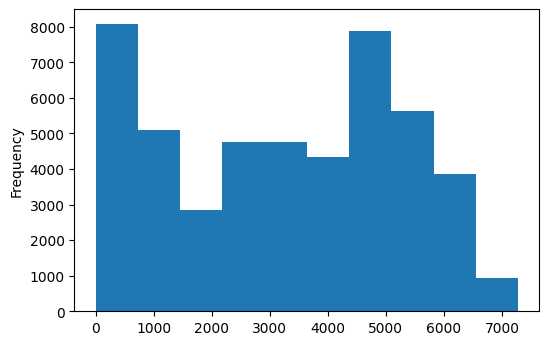

In [8]:
df['traffic_volume'].plot.hist();

In [9]:
df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.

Next, we'll compare daytime with nighttime data.

We'll start by dividing the dataset into two parts:

* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [12]:
df["date_time"] = pd.to_datetime(df['date_time'])

In [53]:
daytime = df[df["date_time"].dt.hour.between(7, 18)]
daytime.shape

(23877, 9)

In [63]:
nighttime = df[(df['date_time'].dt.hour >= 19)
               | (df['date_time'].dt.hour < 7)]
nighttime.shape

(24327, 9)

This significant difference in row numbers between day and night is due to a few hours of missing data. For instance, if you look at rows 176 and 177 (i_94.iloc[176:178]), you'll notice there's no data for two hours (4 and 5).

Now we're going to compare the traffic volume at night and during day

In [68]:
daytime.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


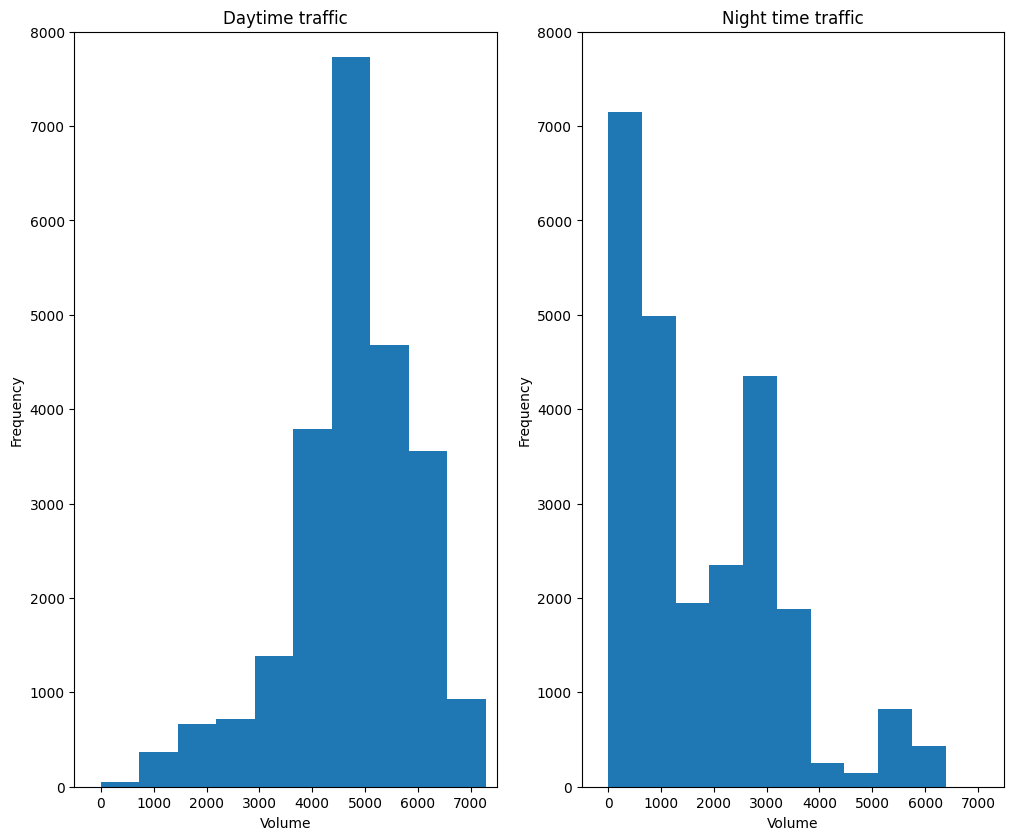

In [77]:
plt.figure(figsize = (12,10));
plt.subplot(1, 2, 1)
plt.hist(daytime["traffic_volume"]);
plt.title("Daytime traffic")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.xlim(-500, 7500);
plt.ylim(0,8000)

#plot the second histogram
plt.subplot(1, 2, 2)
plt.hist(nighttime["traffic_volume"]);
plt.title("Night time traffic")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.xlim(-500, 7500);
plt.ylim(0,8000);

In [78]:
daytime["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [79]:
nighttime["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

We notice that on average there were fewer cars during night time, 1785 cars, versus daytime, 4762 cars.
Also, the histogram that shows the distribution of traffic volume during the day is left skewed, while during the night it's right skewed which reiterates the same conclusion.

Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

* Month
* Day of the week
* Time of day

In [102]:
daytime['month'] = daytime.copy()['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-102-f433cd957ba6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

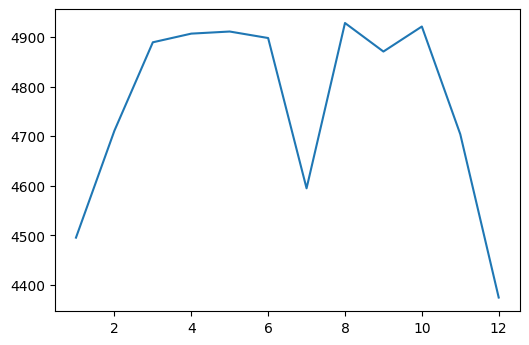

In [95]:
plt.plot(by_month['traffic_volume']);

We notice that the trafic is less heavy in Dec-March months and higher in the summer with the exception of July. 4th of july??

We'll now continue with building line plots for another time unit: day of the week.

In [100]:
daytime['dayofweek'] = daytime.copy()['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

<ipython-input-100-dbf45e0dd167>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

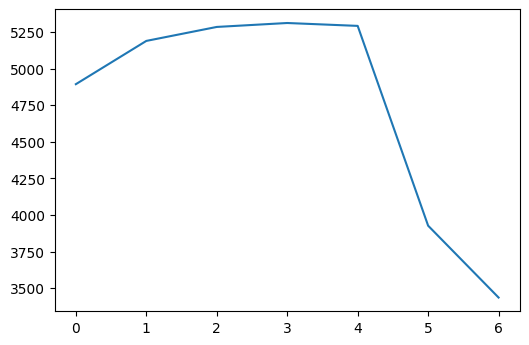

In [99]:
plt.plot(by_dayofweek['traffic_volume']);

We clearly notice that the traffic volume drops considerably during the weekend.

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [101]:
daytime['hour'] = daytime['date_time'].dt.hour
bussiness_days = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-101-f8473ede9f01>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(5.0, 20.0)

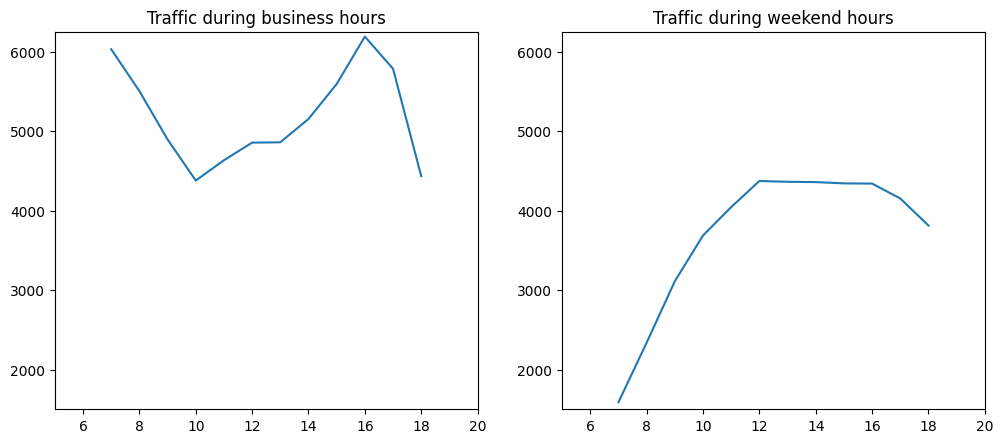

In [118]:
plt.figure(figsize=(12, 5));
plt.subplot(1,2,1);
plt.plot(by_hour_business['traffic_volume']);
plt.title("Traffic during business hours")
plt.ylim(1500, 6250)
plt.xlim(5, 20)

plt.subplot(1,2,2);
plt.plot(by_hour_weekend['traffic_volume']);
plt.title("Traffic during weekend hours")
plt.ylim(1500, 6250)
plt.xlim(5, 20)

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. We notice that rush hour during week days is around 7am and 4pm when people are commuting to work, while during the weekend it peaks at around noon.

We reached the following conclusions:

* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to weekends.
* On business days, the rush hours are around 7 and 16.

Next, we'll focus on weather as another possible indicator.

The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description

In [120]:
daytime.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Here we plot the column with the strongest correlation which is the temperature.

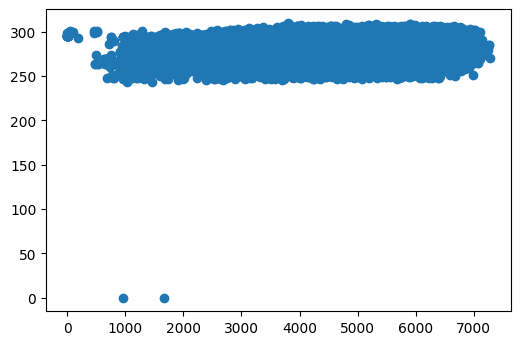

In [124]:
plt.scatter(daytime['traffic_volume'], daytime['temp']);

The 2 points at the bottom of the graph distort the graph, so we will get rid of them.

(225.0, 325.0)

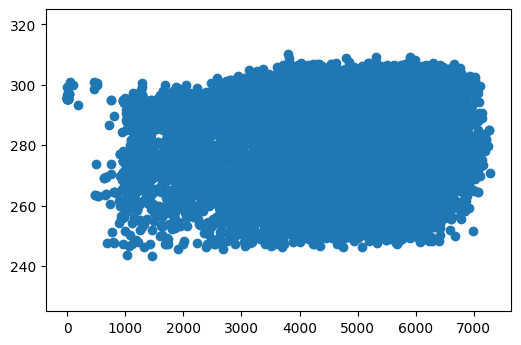

In [126]:
plt.scatter(daytime['traffic_volume'], daytime['temp']);
plt.ylim(225, 325)

Just like the correlation indicator(~13%), the scatter plot shows no reliable correlation.

We'll look next at the categorical weather-related columns: weather_main and weather_description

In [128]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

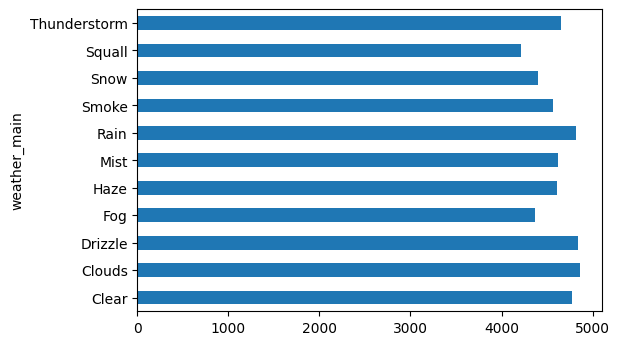

In [132]:
by_weather_main['traffic_volume'].plot.barh();

No type of weather can predict the traffic volume as we see that the volume doesn't exceed 5,00 cars in any of the cases.

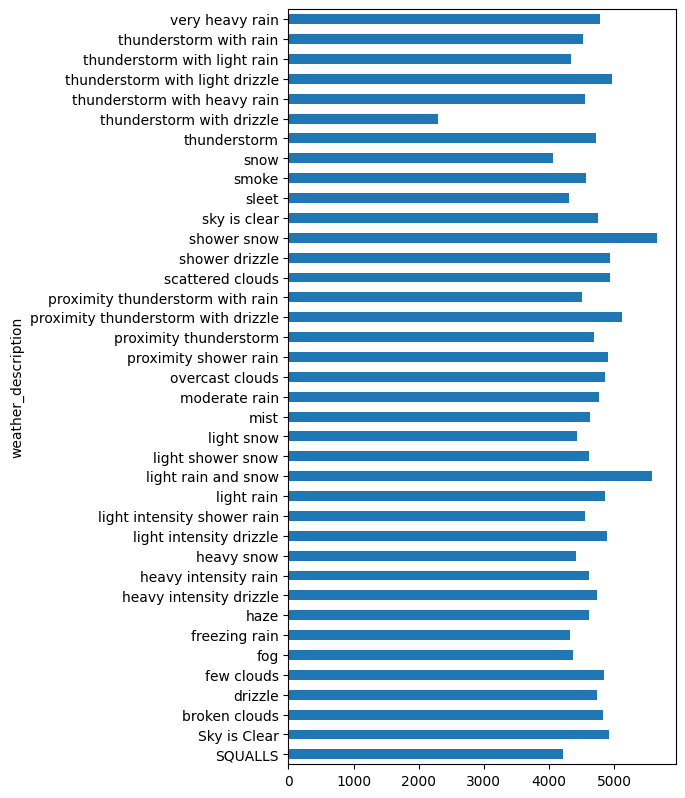

In [135]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10));

There are three weather types where traffic volume exceeds 5,000: shower snow, light rain and snow, and proximity thunderstorm with drizzle. However there is no clear indication of any variable as having any prediction power.

### Conclusion

In this project, we analyzed a few indicators of heavy traffic on the I-94 Interstate highway.

By using visualizing the data with different plots, we came to some conclusions that make sense given what we know about how people go about their lives such as: the traffic being heavier during weekdays and around 7am and 4pm and also lighter during the winter during the cold months.